In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [9]:
df = pd.read_csv('drug200.csv', delimiter=',')
print('Shape: ', df.shape)
df.head()

Shape:  (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [10]:
print(df['Sex'].value_counts())
print(df['Drug'].value_counts())
print(df['BP'].value_counts())
print(df['Cholesterol'].value_counts())

M    104
F     96
Name: Sex, dtype: int64
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


1    104
0     96
Name: Sex, dtype: int64
0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64
0    77
1    64
2    59
Name: BP, dtype: int64
0    103
1     97
Name: Cholesterol, dtype: int64


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'BP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'Na_to_K'}>,
        <Axes: title={'center': 'Drug'}>]], dtype=object)

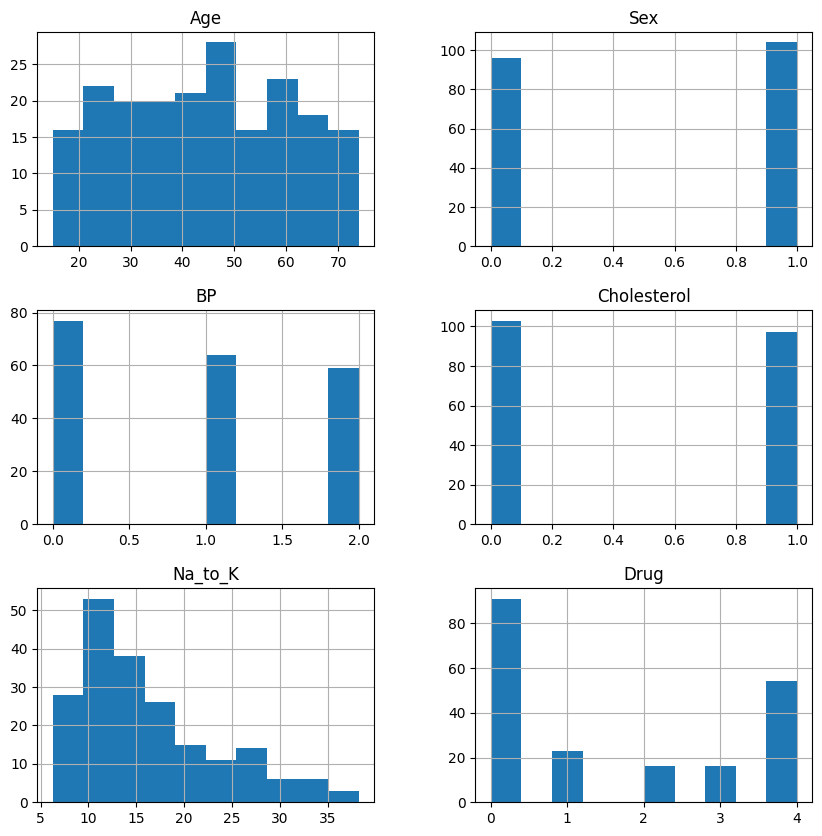

In [11]:
enc = LabelEncoder()
cdf = df
cdf['Drug'] = enc.fit_transform(df['Drug'])
cdf['Cholesterol'] = enc.fit_transform(df['Cholesterol'])
cdf['BP'] = enc.fit_transform(df['BP'])
cdf['Sex'] = enc.fit_transform(df['Sex'])

X = cdf[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = cdf['Drug'].values

print(df['Sex'].value_counts())
print(df['Drug'].value_counts())
print(df['BP'].value_counts())
print(df['Cholesterol'].value_counts())

cdf.hist(figsize=(10,10))

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

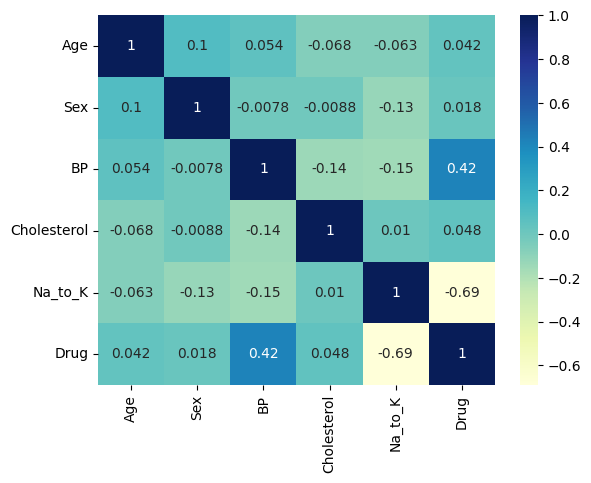

In [17]:
import seaborn as sns
sns.heatmap(cdf.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (150, 5) (150,)
Test set: (50, 5) (50,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# kNN

k_values = list(range(1,25))
acc = []

param_grid={
    'weights':['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}

for k in k_values:
  clf = KNeighborsClassifier(n_neighbors=k)
  grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
  grid.fit(X_train, y_train)

  best_estimator = grid.best_estimator_

  y_pred = best_estimator.predict(X_test)

  acc.append(accuracy_score(y_test, y_pred))


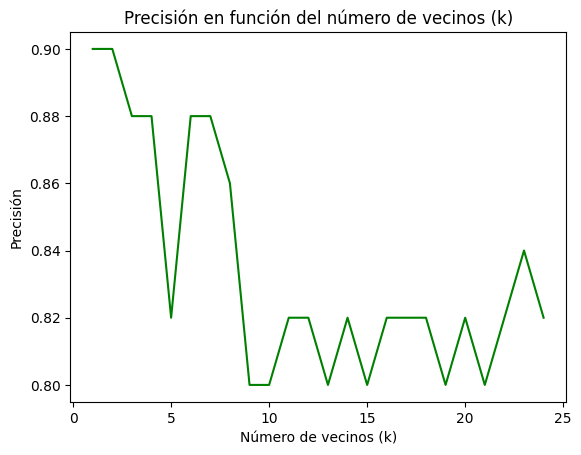

In [29]:
plt.plot(k_values, acc, 'g')
plt.title('Precisión en función del número de vecinos (k)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.show()

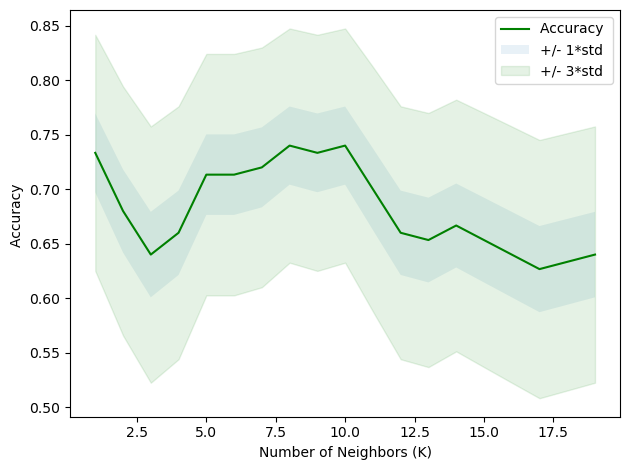

In [ ]:
# logistic regression

In [ ]:
# naive bayes

The best accuracy was with 0.74 with k = 8


In [ ]:
#Decision Tree

In [ ]:
#SVM